# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/cifar/cifar-10-python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 5:
Samples: 10000
Label Counts: {0: 1014, 1: 1014, 2: 952, 3: 1016, 4: 997, 5: 1025, 6: 980, 7: 977, 8: 1003, 9: 1022}
First 20 Labels: [1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8]

Example of Image 1:
Image - Min Value: 1 Max Value: 244
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


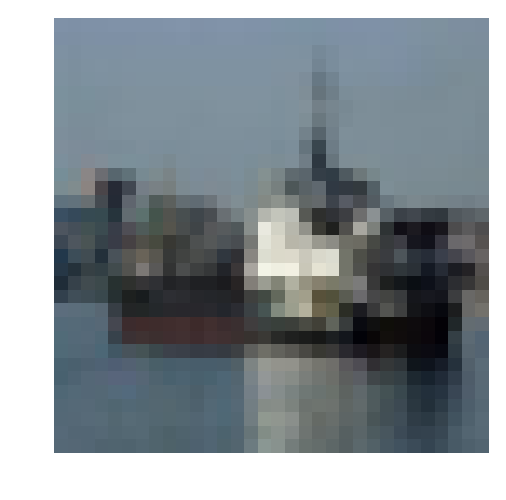

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np
np.random.seed(1729) # for reproducibility

# Explore the dataset
batch_id = 5
sample_id = 1
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return np.clip(x / 255.0, a_min=0, a_max=1)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(range(10))
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    return lb.transform(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

In [7]:
valid_features.shape

(5000, 32, 32, 3)

In [8]:
valid_labels.shape

(5000, 10)

In [9]:
valid_labels[1]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [10]:
type(valid_labels[1][0])

numpy.int64

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [11]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(
        tf.float32, shape=(None, *image_shape), name="x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(
        tf.uint8, shape=(None, n_classes), name="y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # NB:
    # allowing any shape to pass the (bugged) test instead of
    # setting to scalar with shape = ()
    return tf.placeholder(
        tf.float32, name="keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
# NB: there is a bug in this test
# instead of "assert nn_inputs_out_k.get_shape().ndims is None"
# it should be "assert nn_inputs_out_k.get_shape().ndims == 0"
# checking for None allows any shape instead of ensuring scalar
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [12]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # assuming NHWC input
    in_channels = x_tensor.get_shape().as_list()[-1]
    strides = [1] + list(conv_strides) + [1]   
    kernel = tf.Variable(
        tf.truncated_normal(list(conv_ksize) + [in_channels, conv_num_outputs],
        mean=0.0, stddev=tf.sqrt(2.0 / in_channels))
        ) # Kaiming He
    bias = tf.Variable(tf.zeros([conv_num_outputs]))    
    pool_ksize = [1] + list(pool_ksize) + [1]
    pool_strides = [1] + list(pool_strides) + [1]
    
    net = tf.nn.conv2d(x_tensor, kernel, strides, padding="SAME")
    net = tf.nn.bias_add(net, bias)
    net = tf.nn.elu(net)
    net = tf.nn.max_pool(net, pool_ksize, pool_strides, padding="SAME")    
    return net


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [13]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    return tf.contrib.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [14]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.layers.dense(
        x_tensor, num_outputs, activation=tf.nn.elu,
        # Kaiming He 
        kernel_initializer=tf.contrib.layers.variance_scaling_initializer())
        


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [15]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.layers.dense(
        x_tensor, num_outputs, activation=None,
        # Kaiming He 
        kernel_initializer=tf.contrib.layers.variance_scaling_initializer())


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [16]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    net = conv2d_maxpool(x, 32, (3, 3), (1, 1), (3, 3), (2, 2))
    net = conv2d_maxpool(net, 64, (3, 3), (1, 1), (3, 3), (2, 2))
    keep_prob_0 = tf.clip_by_value(
        keep_prob + 0.2, clip_value_min=0.0, clip_value_max=1.0)
    net = tf.nn.dropout(net, keep_prob_0)
    net = conv2d_maxpool(net, 128, (3, 3), (1, 1), (3, 3), (2, 2))    

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    net = flatten(net)
    keep_prob_1 = tf.clip_by_value(
        keep_prob - 0.25, clip_value_min=0.0, clip_value_max=1.0)
    net = tf.nn.dropout(net, keep_prob_1)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    net = fully_conn(net, 128)
    keep_prob_2 = tf.clip_by_value(
        keep_prob - 0.25, clip_value_min=0.0, clip_value_max=1.0)
    net = tf.nn.dropout(net, keep_prob_2)
    net = fully_conn(net, 64)
    net = tf.nn.dropout(net, keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    net = output(net, 10)
    
    # TODO: return output
    return net


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()
tf.set_random_seed(1729) # added for reproducibility

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [17]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(
        optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [18]:
# it would be bad design to hardcode global `valid_features` and `valid_labels` in function definition
# instead, this function will get called by using `valid_features` and `valid_labels` for val stats
# this way it can be used for train vs val stats (see training)
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    loss = session.run(
        cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0})
    acc = session.run(
        accuracy, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0})    
    print("loss {}, accuracy {}".format(loss, acc))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [19]:
# TODO: Tune Parameters
epochs = 70
batch_size = 100 # works better with smaller batches
keep_probability = 0.7 # it would be better to increase dropout later on; early on it is difficult to learn

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL 

NB: Modified to print both training and validation stats.
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i))        
        # modification to print both validation and training stats, to check for overfitting
        print("Training batch stats: ", end="")
        print_stats(sess, batch_features, batch_labels, cost, accuracy)       
        print("Validation stats: ", end="")
        print_stats(sess, valid_features, valid_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  
Training batch stats: loss 2.484490156173706, accuracy 0.10999999940395355
Validation stats: loss 2.5272440910339355, accuracy 0.09799999743700027
Epoch  2, CIFAR-10 Batch 1:  
Training batch stats: loss 2.4573185443878174, accuracy 0.09999999403953552
Validation stats: loss 2.416590929031372, accuracy 0.09259998798370361
Epoch  3, CIFAR-10 Batch 1:  
Training batch stats: loss 2.3482601642608643, accuracy 0.07999999821186066
Validation stats: loss 2.3717780113220215, accuracy 0.10279998928308487
Epoch  4, CIFAR-10 Batch 1:  
Training batch stats: loss 2.3040146827697754, accuracy 0.03999999910593033
Validation stats: loss 2.3444814682006836, accuracy 0.09780000150203705
Epoch  5, CIFAR-10 Batch 1:  
Training batch stats: loss 2.3120176792144775, accuracy 0.08999999612569809
Validation stats: loss 2.3343217372894287, accuracy 0.10559999942779541
Epoch  6, CIFAR-10 Batch 1:  
Training batch stats: loss 2.3183138370

Validation stats: loss 1.32275390625, accuracy 0.5159999132156372
Epoch 48, CIFAR-10 Batch 1:  
Training batch stats: loss 1.313307762145996, accuracy 0.5499999523162842
Validation stats: loss 1.2764259576797485, accuracy 0.5215999484062195
Epoch 49, CIFAR-10 Batch 1:  
Training batch stats: loss 1.222744107246399, accuracy 0.5899999737739563
Validation stats: loss 1.2720277309417725, accuracy 0.5383999347686768
Epoch 50, CIFAR-10 Batch 1:  
Training batch stats: loss 1.2118511199951172, accuracy 0.5699999928474426
Validation stats: loss 1.2994978427886963, accuracy 0.525999903678894
Epoch 51, CIFAR-10 Batch 1:  
Training batch stats: loss 1.1199517250061035, accuracy 0.6699999570846558
Validation stats: loss 1.2732117176055908, accuracy 0.533799946308136
Epoch 52, CIFAR-10 Batch 1:  
Training batch stats: loss 1.1958317756652832, accuracy 0.559999942779541
Validation stats: loss 1.2192966938018799, accuracy 0.5641999244689941
Epoch 53, CIFAR-10 Batch 1:  
Training batch stats: loss 1.

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL

NB: Modified to print both training and validation stats.
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i))
            # modification to print both validation and training stats, to check for overfitting
            print("Training batch stats: ", end="")
            print_stats(sess, batch_features, batch_labels, cost, accuracy)            
            print("Validation stats: ", end="")
            print_stats(sess, valid_features, valid_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  
Training batch stats: loss 2.485759973526001, accuracy 0.10999999940395355
Validation stats: loss 2.528090238571167, accuracy 0.09799999743700027
Epoch  1, CIFAR-10 Batch 2:  
Training batch stats: loss 2.416788101196289, accuracy 0.14000000059604645
Validation stats: loss 2.435547113418579, accuracy 0.09359999001026154
Epoch  1, CIFAR-10 Batch 3:  
Training batch stats: loss 2.395716905593872, accuracy 0.09999999403953552
Validation stats: loss 2.3823087215423584, accuracy 0.09879998862743378
Epoch  1, CIFAR-10 Batch 4:  
Training batch stats: loss 2.3358845710754395, accuracy 0.10999999940395355
Validation stats: loss 2.3512349128723145, accuracy 0.09479999542236328
Epoch  1, CIFAR-10 Batch 5:  
Training batch stats: loss 2.315605401992798, accuracy 0.07999999076128006
Validation stats: loss 2.3387269973754883, accuracy 0.09799999743700027
Epoch  2, CIFAR-10 Batch 1:  
Training batch stats: loss 2.31978702545166, accuracy 0.10000000149011612


Validation stats: loss 1.5097345113754272, accuracy 0.4225999712944031
Epoch 10, CIFAR-10 Batch 3:  
Training batch stats: loss 1.4020473957061768, accuracy 0.44999998807907104
Validation stats: loss 1.4900364875793457, accuracy 0.43039995431900024
Epoch 10, CIFAR-10 Batch 4:  
Training batch stats: loss 1.4472479820251465, accuracy 0.4699999988079071
Validation stats: loss 1.4691429138183594, accuracy 0.4487999379634857
Epoch 10, CIFAR-10 Batch 5:  
Training batch stats: loss 1.4005062580108643, accuracy 0.4399999678134918
Validation stats: loss 1.4258134365081787, accuracy 0.45020002126693726
Epoch 11, CIFAR-10 Batch 1:  
Training batch stats: loss 1.4561809301376343, accuracy 0.4899999797344208
Validation stats: loss 1.3840832710266113, accuracy 0.4935999810695648
Epoch 11, CIFAR-10 Batch 2:  
Training batch stats: loss 1.4501395225524902, accuracy 0.550000011920929
Validation stats: loss 1.3676071166992188, accuracy 0.47359994053840637
Epoch 11, CIFAR-10 Batch 3:  
Training batch s

Validation stats: loss 0.8942998647689819, accuracy 0.6821998953819275
Epoch 19, CIFAR-10 Batch 5:  
Training batch stats: loss 0.7696872353553772, accuracy 0.7200000286102295
Validation stats: loss 0.8959847688674927, accuracy 0.6901998519897461
Epoch 20, CIFAR-10 Batch 1:  
Training batch stats: loss 0.8403536081314087, accuracy 0.6899999976158142
Validation stats: loss 0.8912909030914307, accuracy 0.6871998906135559
Epoch 20, CIFAR-10 Batch 2:  
Training batch stats: loss 0.6848267912864685, accuracy 0.7299999594688416
Validation stats: loss 0.8654153943061829, accuracy 0.696199893951416
Epoch 20, CIFAR-10 Batch 3:  
Training batch stats: loss 0.6690528392791748, accuracy 0.7699999809265137
Validation stats: loss 0.8800340294837952, accuracy 0.6851998567581177
Epoch 20, CIFAR-10 Batch 4:  
Training batch stats: loss 0.7065935134887695, accuracy 0.7799999713897705
Validation stats: loss 0.8463115692138672, accuracy 0.7103998064994812
Epoch 20, CIFAR-10 Batch 5:  
Training batch stats

Validation stats: loss 0.771808922290802, accuracy 0.7279998660087585
Epoch 29, CIFAR-10 Batch 2:  
Training batch stats: loss 0.585713803768158, accuracy 0.8399999737739563
Validation stats: loss 0.75751793384552, accuracy 0.7341998219490051
Epoch 29, CIFAR-10 Batch 3:  
Training batch stats: loss 0.42079871892929077, accuracy 0.8299999833106995
Validation stats: loss 0.7648449540138245, accuracy 0.7425998449325562
Epoch 29, CIFAR-10 Batch 4:  
Training batch stats: loss 0.593571126461029, accuracy 0.7999999523162842
Validation stats: loss 0.7834838628768921, accuracy 0.7323998212814331
Epoch 29, CIFAR-10 Batch 5:  
Training batch stats: loss 0.5922148823738098, accuracy 0.8199999332427979
Validation stats: loss 0.7461837530136108, accuracy 0.7417998313903809
Epoch 30, CIFAR-10 Batch 1:  
Training batch stats: loss 0.708267331123352, accuracy 0.75
Validation stats: loss 0.7522121071815491, accuracy 0.7411998510360718
Epoch 30, CIFAR-10 Batch 2:  
Training batch stats: loss 0.482871830

Validation stats: loss 0.7086150646209717, accuracy 0.756199836730957
Epoch 38, CIFAR-10 Batch 4:  
Training batch stats: loss 0.47655177116394043, accuracy 0.8100000023841858
Validation stats: loss 0.7283015847206116, accuracy 0.7613998651504517
Epoch 38, CIFAR-10 Batch 5:  
Training batch stats: loss 0.5569239854812622, accuracy 0.800000011920929
Validation stats: loss 0.7059165835380554, accuracy 0.7711997628211975
Epoch 39, CIFAR-10 Batch 1:  
Training batch stats: loss 0.717522919178009, accuracy 0.75
Validation stats: loss 0.7265937328338623, accuracy 0.7605998516082764
Epoch 39, CIFAR-10 Batch 2:  
Training batch stats: loss 0.530656635761261, accuracy 0.8600000143051147
Validation stats: loss 0.7231164574623108, accuracy 0.75739985704422
Epoch 39, CIFAR-10 Batch 3:  
Training batch stats: loss 0.41516804695129395, accuracy 0.8299999237060547
Validation stats: loss 0.7033452987670898, accuracy 0.7607998847961426
Epoch 39, CIFAR-10 Batch 4:  
Training batch stats: loss 0.47461178

Validation stats: loss 0.6675043106079102, accuracy 0.7773998379707336
Epoch 48, CIFAR-10 Batch 1:  
Training batch stats: loss 0.5571147203445435, accuracy 0.7699999213218689
Validation stats: loss 0.6756328344345093, accuracy 0.7753998637199402
Epoch 48, CIFAR-10 Batch 2:  
Training batch stats: loss 0.400856614112854, accuracy 0.8600000143051147
Validation stats: loss 0.6749883890151978, accuracy 0.779999852180481
Epoch 48, CIFAR-10 Batch 3:  
Training batch stats: loss 0.3231736719608307, accuracy 0.9200000166893005
Validation stats: loss 0.6717768907546997, accuracy 0.7763998508453369
Epoch 48, CIFAR-10 Batch 4:  
Training batch stats: loss 0.42190903425216675, accuracy 0.8600000143051147
Validation stats: loss 0.7005435228347778, accuracy 0.7659998536109924
Epoch 48, CIFAR-10 Batch 5:  
Training batch stats: loss 0.4423786997795105, accuracy 0.8499999642372131
Validation stats: loss 0.7096437215805054, accuracy 0.763999879360199
Epoch 49, CIFAR-10 Batch 1:  
Training batch stats:

Validation stats: loss 0.6601013541221619, accuracy 0.7845998406410217
Epoch 57, CIFAR-10 Batch 3:  
Training batch stats: loss 0.309250146150589, accuracy 0.9299999475479126
Validation stats: loss 0.6660959720611572, accuracy 0.7847998142242432
Epoch 57, CIFAR-10 Batch 4:  
Training batch stats: loss 0.36600562930107117, accuracy 0.8899999856948853
Validation stats: loss 0.6640430092811584, accuracy 0.7781997919082642
Epoch 57, CIFAR-10 Batch 5:  
Training batch stats: loss 0.3895800709724426, accuracy 0.8199999928474426
Validation stats: loss 0.6779923439025879, accuracy 0.7779998779296875
Epoch 58, CIFAR-10 Batch 1:  
Training batch stats: loss 0.5694162845611572, accuracy 0.8300000429153442
Validation stats: loss 0.6664438247680664, accuracy 0.7895998358726501
Epoch 58, CIFAR-10 Batch 2:  
Training batch stats: loss 0.37708860635757446, accuracy 0.8600000143051147
Validation stats: loss 0.6640602350234985, accuracy 0.7843998074531555
Epoch 58, CIFAR-10 Batch 3:  
Training batch sta

Validation stats: loss 0.6472717523574829, accuracy 0.7843998670578003
Epoch 66, CIFAR-10 Batch 5:  
Training batch stats: loss 0.4188816249370575, accuracy 0.8500000238418579
Validation stats: loss 0.6692047119140625, accuracy 0.7827997803688049
Epoch 67, CIFAR-10 Batch 1:  
Training batch stats: loss 0.45112019777297974, accuracy 0.8600000739097595
Validation stats: loss 0.6583451628684998, accuracy 0.7867998480796814
Epoch 67, CIFAR-10 Batch 2:  
Training batch stats: loss 0.35509398579597473, accuracy 0.8700000047683716
Validation stats: loss 0.6976973414421082, accuracy 0.7741998434066772
Epoch 67, CIFAR-10 Batch 3:  
Training batch stats: loss 0.27211108803749084, accuracy 0.9199999570846558
Validation stats: loss 0.680692732334137, accuracy 0.7865998148918152
Epoch 67, CIFAR-10 Batch 4:  
Training batch stats: loss 0.38078582286834717, accuracy 0.8800000548362732
Validation stats: loss 0.6847535371780396, accuracy 0.7839998006820679
Epoch 67, CIFAR-10 Batch 5:  
Training batch s

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.7790999752283096



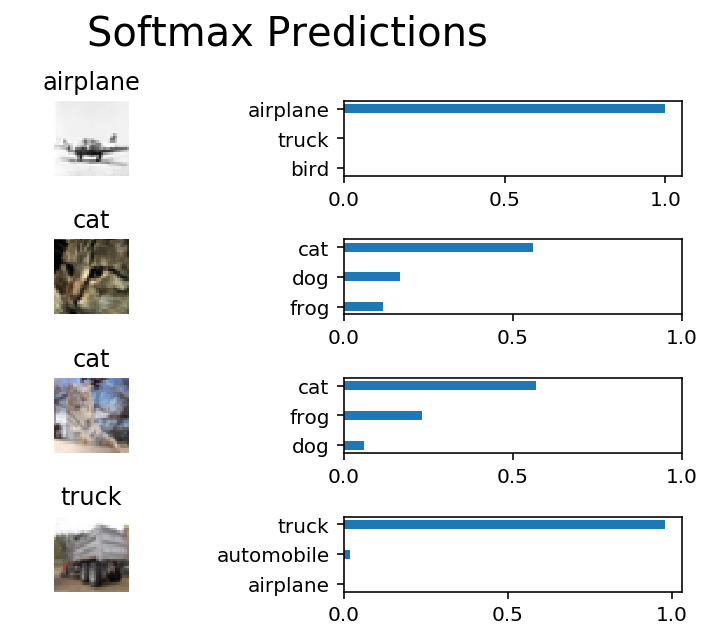

In [22]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.